In [18]:
import xarray as xr
import rioxarray
from datetime import date
from datetime import datetime
from datetime import timedelta
import julian

In [19]:
#da = xr.open_rasterio('interpolation.tif')

In [20]:
#da.plot(levels=15)

In [21]:
# Origem jd: 
#    meio-dia de 01 de janeiro de 4713 a.C. pelo calendário juliano
#    meio-dia de 24 de novembro de 4714 a.C., pelo calendário gregoriano.
# DJ = D - 32075 + 1461*( A + 4800 + ( M - 14 ) / 12 ) / 4 + 367*( M - 2 - ( M - 14 ) / 12 * 12 ) / 12 - 3*( ( A + 4900 + ( M - 14 ) / 12 ) / 100 ) / 4

In [51]:
pixel = 92

july_01 = datetime(2019, 7, 1)
jd_july_01 = julian.to_jd(july_01, fmt='jd')

jd_date_pixel = julian.to_jd(july_01 + timedelta(days = pixel), fmt='jd')

julian.from_jd(jd_date_pixel, fmt='jd')

datetime.datetime(2019, 10, 1, 0, 0)

In [52]:
d = 91
for i in range(6):
    print(d)
    d = d +15

91
106
121
136
151
166


In [3]:
idt = datetime(2019, 7, 1)

In [4]:
jd_july_01

2458665.5

In [5]:
jd_date_pixel

2458875.5

In [4]:
def deltaDaysFromPixelDate(idt, pdt):
    """
    Args:
        idt: initial date time (datetime.datetime object)
        pdt: data from xarray 2D dataset
    """
    
    jd_idt = julian.to_jd(idt, fmt='jd')
    
    for i in range(pdt.shape[1]):
        for j in range(pdt.shape[2]):
            pdt[0, i, j] = julian.to_jd(idt + timedelta(days = pdt[0, i, j]), fmt='jd')
            
    return pdt

In [7]:
da.data = deltaDaysFromPixelDate(idt, da.data)

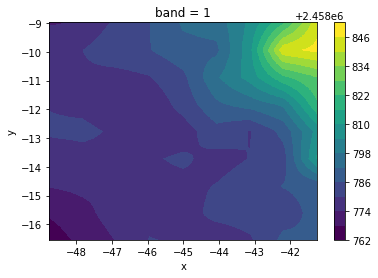

In [11]:
da.plot(levels=15)

In [12]:
da = da.rio.write_crs(4326)
da.rio.to_raster('interp_julian.tif')

In [12]:
julian.from_jd(2458790.846550395, fmt='jd')

datetime.datetime(2019, 11, 3, 8, 19, 1, 954109)

In [7]:
# python3.7 gdal_reclassify.py interpolation.tif reclassify.tif -c "<60, <75, <90, <105, <120, <135, <150, <165, <180, <195, <210" -r "60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210" -d 0 -n true -p "COMPRESS=LZW"

[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225]

In [8]:
# gdal_polygonize.py -8 -f "Esri Shapefile" reclassify.tif reclassify.shp onset